In [4]:
# Pacotes necessários
import pandas as pd
import pandas_datareader
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt
import pypfopt as pyp
import seaborn as sns
import datetime
import yfinance as yf
idx = pd.IndexSlice


#import os
#cwd = os.getcwd()


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#cwd

In [5]:
#download dos market capitalization das empresas direto do Yahoo Finance

# tickers = ['VALE3.SA','ITUB4.SA','B3SA3.SA','PETR4.SA','BBDC4.SA','ABEV3.SA','MGLU3.SA','BBAS3.SA','LREN3.SA',
#           'JBSS3.SA','GNDI3.SA','WEGE3.SA','NTCO3.SA','SUZB3.SA','RAIL3.SA']

# data.get_quote_yahoo(tickers)['marketCap']

In [6]:
# ler valor de mercado e detalhes dos tickers

mcap = pd.read_excel('C:\\Users\\arena\\TCC\\11 Ações\Mkt Cap11.xlsx')
#df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
mcap.head()



,Company Name (M.Cap),Tickers,Ticket Yfinance,Market Cap
0,VALE,VALE3,VALE3.SA,481000000000
1,ITAUUNIBANCO,ITUB4,ITUB4.SA,271000000000
2,B3,B3SA3,B3SA3.SA,119000000000
3,PETROBRAS,PETR4,PETR4.SA,359000000000
4,BRADESCO,BBDC4,BBDC4.SA,207000000000


In [7]:
# criar lista de Tickers
tickers = [ticker for ticker in mcap.Tickers]
print(tickers)

['VALE3', 'ITUB4', 'B3SA3', 'PETR4', 'BBDC4', 'ABEV3', 'BBAS3', 'LREN3', 'JBSS3', 'WEGE3', 'NTCO3']


In [8]:
# Ler preços diários dos CSV
prices = pd.read_excel('C:\\Users\\arena\\TCC\\11 Ações\prices11_all.xlsx', index_col=[0], parse_dates=[0])
prices.head(2)


,VALE3,ITUB4,B3SA3,PETR4,BBDC4,ABEV3,BBAS3,LREN3,JBSS3,WEGE3,NTCO3
Date,,,,,,,,,,,
2009-12-30,49.50,17.617,12.25,36.69,12.911,6.973,29.7,6.496,9.32,5.444,18.154
2010-01-04,51.49,18.268,12.95,37.32,13.379,7.097,29.9,6.653,9.67,5.423,18.949


In [9]:
# Criar dicionário dos valores de mercado
mcap_dict = {ticker : cap for ticker, cap in zip(mcap['Tickers'].values, mcap['Market Cap'].values)}
print(mcap_dict)

{'VALE3': 481000000000, 'ITUB4': 271000000000, 'B3SA3': 119000000000, 'PETR4': 359000000000, 'BBDC4': 207000000000, 'ABEV3': 238000000000, 'BBAS3': 168000000000, 'LREN3': 32529350656, 'JBSS3': 63984091136, 'WEGE3': 59448578048, 'NTCO3': 67814449152}


In [10]:
# ler arquivo de preços diários de mercado
market_prices = pd.read_excel('C:\\Users\\arena\\TCC\\11 Ações\market_prices11_all.xlsx', index_col=[0], parse_dates=[0])
market_prices.head(2)


,IBOV
2009-12-30,68588.4
2010-01-04,70045.1


In [11]:

# Calcular covariancia dos ativos e o fator de risco
# market-implied risk premium, which is the market’s excess return divided by its variance
S = pyp.risk_models.CovarianceShrinkage(prices).ledoit_wolf()
delta = pyp.black_litterman.market_implied_risk_aversion(market_prices['IBOV'], risk_free_rate=0.02)
print(delta)

0.7187389165767941


In [12]:
#criar imagem da correlação dos ativos
#fig, ax = plt.subplots(figsize=(10,8))
#sns.heatmap(prices.pct_change().corr(method ='spearman'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f")
#ax.set_title('Matrix de Correlação de Ativos')
#plt.savefig('C:\\Users\\arena\\TCC\\11 Ações\Correlação de Ativos', dpi=300)

In [13]:
# calcular retornos esperados a priori
market_prior = pyp.black_litterman.market_implied_prior_returns(mcap_dict, delta, S)
market_prior.name = 'Prior'
print(market_prior)

VALE3    0.085112
ITUB4    0.071415
B3SA3    0.072371
PETR4    0.099484
BBDC4    0.076103
ABEV3    0.047036
BBAS3    0.086979
LREN3    0.063473
JBSS3    0.064012
WEGE3    0.046908
NTCO3    0.062525
Name: Prior, dtype: float64


In [14]:
# criar figura dos retornos a priori
#market_prior.plot.barh(figsize=(12,6), title = 'Retornos de Mercado - A Priori',grid=True);
#plt.savefig('C:\\Users\\arena\\TCC\\11 Ações\A Posteriori - Retornos Esperados do Mercado - A Priori', dpi=300)

In [15]:
# ler arquivo com as visões dos investidores 
#view_confidence = pd.read_csv('C:\\Users\\arena\\TCC\\views.csv')
view_confidence = pd.read_excel('C:\\Users\\arena\\TCC\\11 Ações\\visoes base.xlsx',index_col=[0])

view_confidence

,View,Confidences
Tickers,,
VALE3,0.05,0.5
ITUB4,0.05,0.5
B3SA3,0.05,0.5
PETR4,0.05,0.5
BBDC4,0.05,0.5
ABEV3,0.05,0.5
BBAS3,0.05,0.5
LREN3,0.05,0.5
JBSS3,0.05,0.5


In [16]:
# criar novo dicionário com as visões
views_dict = {ind : view_confidence['View'][ind] for ind in view_confidence.index}
print(views_dict)

{'VALE3': 0.05, 'ITUB4': 0.05, 'B3SA3': 0.05, 'PETR4': 0.05, 'BBDC4': 0.05, 'ABEV3': 0.05, 'BBAS3': 0.05, 'LREN3': 0.05, 'JBSS3': 0.05, 'WEGE3': 0.05, 'NTCO3': 0.05}


Modelo Black Litterman

In [17]:

# rodar o modelo de BL
bl = pyp.BlackLittermanModel(S, pi=market_prior, absolute_views=views_dict)


In [18]:

# calcular os retornos estimados a posteriori
bl_return = bl.bl_returns()
bl_return.name = 'Posterior'

In [19]:
# calcular os retornos historicos
mu = pyp.expected_returns.mean_historical_return(prices)
mu.name = 'Historical'
print(mu)

VALE3    0.008571
ITUB4    0.046988
B3SA3    0.150405
PETR4   -0.047930
BBDC4    0.058781
ABEV3    0.074776
BBAS3    0.019519
LREN3    0.210848
JBSS3    0.085268
WEGE3    0.231164
NTCO3    0.083571
Name: Historical, dtype: float64


In [20]:

# criar um arquivo dataframe
returns_df = pd.DataFrame([market_prior, mu, bl_return, pd.Series(views_dict)], 
             index=['Prior', 'Histórico','Posterior', 'Visões']).T
print(returns_df)

          Prior  Histórico  Posterior  Visões
VALE3  0.085112   0.008571   0.061473    0.05
ITUB4  0.071415   0.046988   0.052644    0.05
B3SA3  0.072371   0.150405   0.053435    0.05
PETR4  0.099484  -0.047930   0.066891    0.05
BBDC4  0.076103   0.058781   0.055233    0.05
ABEV3  0.047036   0.074776   0.044092    0.05
BBAS3  0.086979   0.019519   0.059785    0.05
LREN3  0.063473   0.210848   0.049817    0.05
JBSS3  0.064012   0.085268   0.050482    0.05
WEGE3  0.046908   0.231164   0.044051    0.05
NTCO3  0.062525   0.083571   0.050017    0.05


In [21]:
# salvar arquivo com os retornos calculados
returns_df.to_csv('C:\\Users\\arena\\TCC\\11 Ações\\returns.csv', header=True,)
returns_df = pd.read_csv('C:\\Users\\arena\\TCC\\11 Ações\\returns.csv', index_col=[0], )


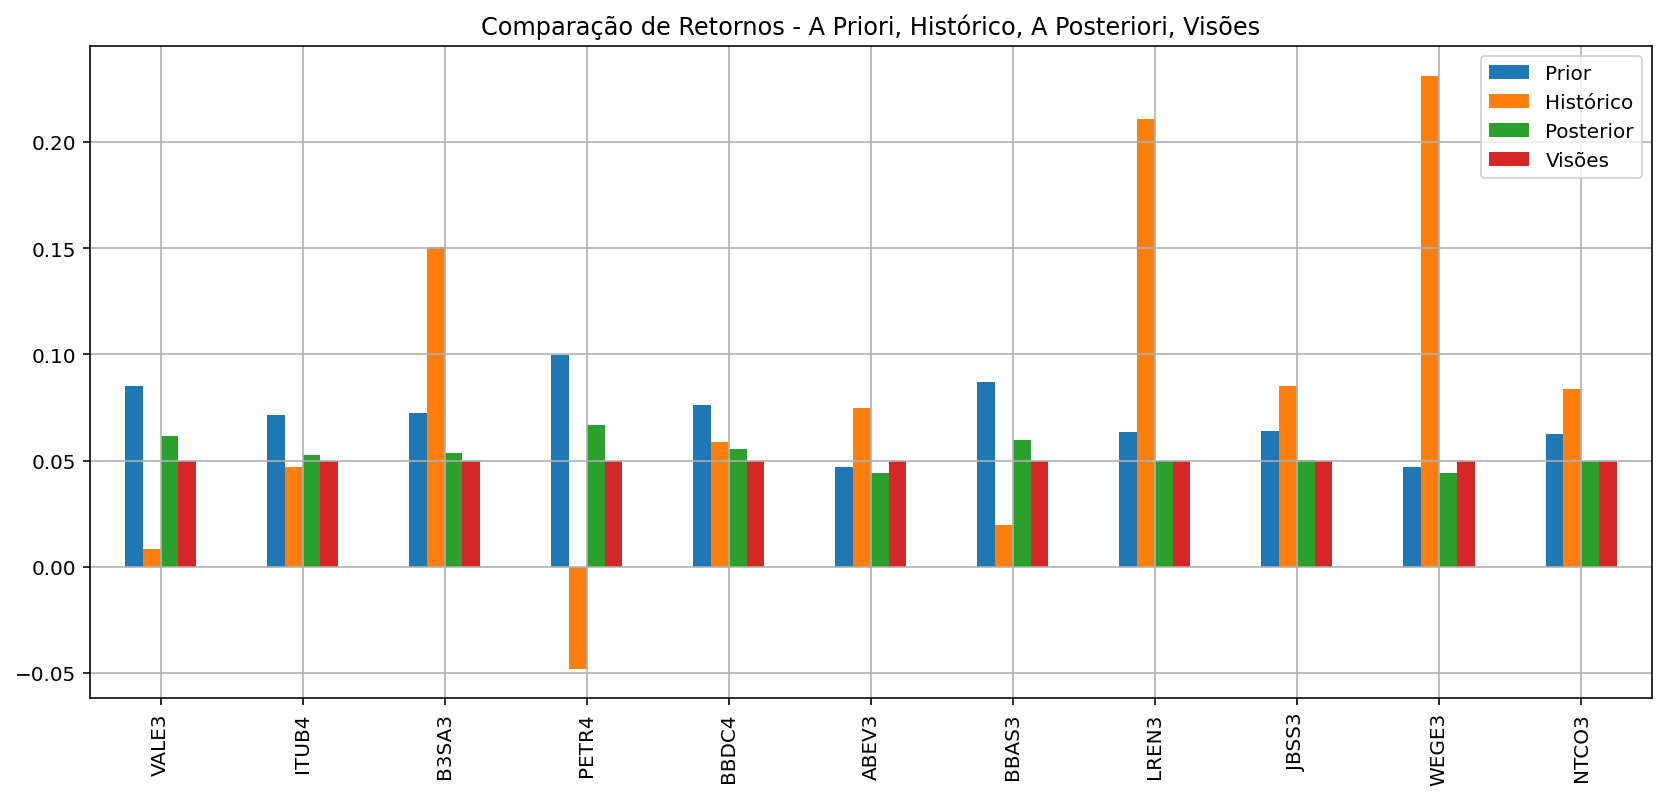

In [22]:
# criar gráfico com os retornos
returns_df.plot.bar(figsize=(14,6), title = 'Comparação de Retornos - A Priori, Histórico, A Posteriori, Visões', grid=True);
plt.savefig('C:\\Users\\arena\\TCC\\11 Ações\\Comparação de Retornos', dpi=300)

In [23]:
# calcular a matriz de covariância
S_bl = bl.bl_cov()
S_bl.to_csv('C:\\Users\\arena\\TCC\\11 Ações\\S_bl.csv')
S_bl = pd.read_csv('C:\\Users\\arena\\TCC\\11 Ações\\S_bl.csv',  index_col=[0])
S_bl.head()

,VALE3,ITUB4,B3SA3,PETR4,BBDC4,ABEV3,BBAS3,LREN3,JBSS3,WEGE3,NTCO3
VALE3,0.187689,0.054161,0.058562,0.100473,0.060692,0.029903,0.069350,0.048967,0.051662,0.031622,0.053332
ITUB4,0.054161,0.101647,0.072068,0.087974,0.093728,0.033800,0.100842,0.060467,0.052041,0.034706,0.050951
B3SA3,0.058562,0.072068,0.137948,0.096623,0.078495,0.035886,0.092059,0.068070,0.062568,0.039303,0.058925
PETR4,0.100473,0.087974,0.096623,0.227958,0.098194,0.039007,0.125017,0.074673,0.075178,0.045154,0.072868
BBDC4,0.060692,0.093728,0.078495,0.098194,0.114956,0.037251,0.110995,0.068022,0.057453,0.037973,0.057242


In [24]:
# criar o vetor do fator de confianca
confidences = list(view_confidence.Confidences)
print(confidences)

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


In [25]:
# utilizar o método de IDzorek e rodar o modelo de BL
bl_confi = pyp.BlackLittermanModel(S, pi=market_prior, 
                                   absolute_views=views_dict, 
                                   omega="idzorek", view_confidences=confidences)



In [26]:

# Retornos a posteriori
bl_return_confi = bl_confi.bl_returns()
bl_return_confi.name = 'Posterior_confidence'

In [27]:
returns_df = pd.DataFrame([market_prior, mu, bl_return, pd.Series(views_dict), bl_return_confi], 
             index=['Prior', 'Historical','Posterior', 'Views', 'Posterior_confidence']).T
print(returns_df)

          Prior  Historical  Posterior  Views  Posterior_confidence
VALE3  0.085112    0.008571   0.061473   0.05              0.061473
ITUB4  0.071415    0.046988   0.052644   0.05              0.052644
B3SA3  0.072371    0.150405   0.053435   0.05              0.053435
PETR4  0.099484   -0.047930   0.066891   0.05              0.066891
BBDC4  0.076103    0.058781   0.055233   0.05              0.055233
ABEV3  0.047036    0.074776   0.044092   0.05              0.044092
BBAS3  0.086979    0.019519   0.059785   0.05              0.059785
LREN3  0.063473    0.210848   0.049817   0.05              0.049817
JBSS3  0.064012    0.085268   0.050482   0.05              0.050482
WEGE3  0.046908    0.231164   0.044051   0.05              0.044051
NTCO3  0.062525    0.083571   0.050017   0.05              0.050017


In [28]:
# salvar arquivo com os novos retornos
returns_df.to_csv('C:\\Users\\arena\\TCC\\11 Ações\\returns.csv', header=True,)
returns_df = pd.read_csv('C:\\Users\\arena\\TCC\\11 Ações\\returns.csv', index_col=[0],)


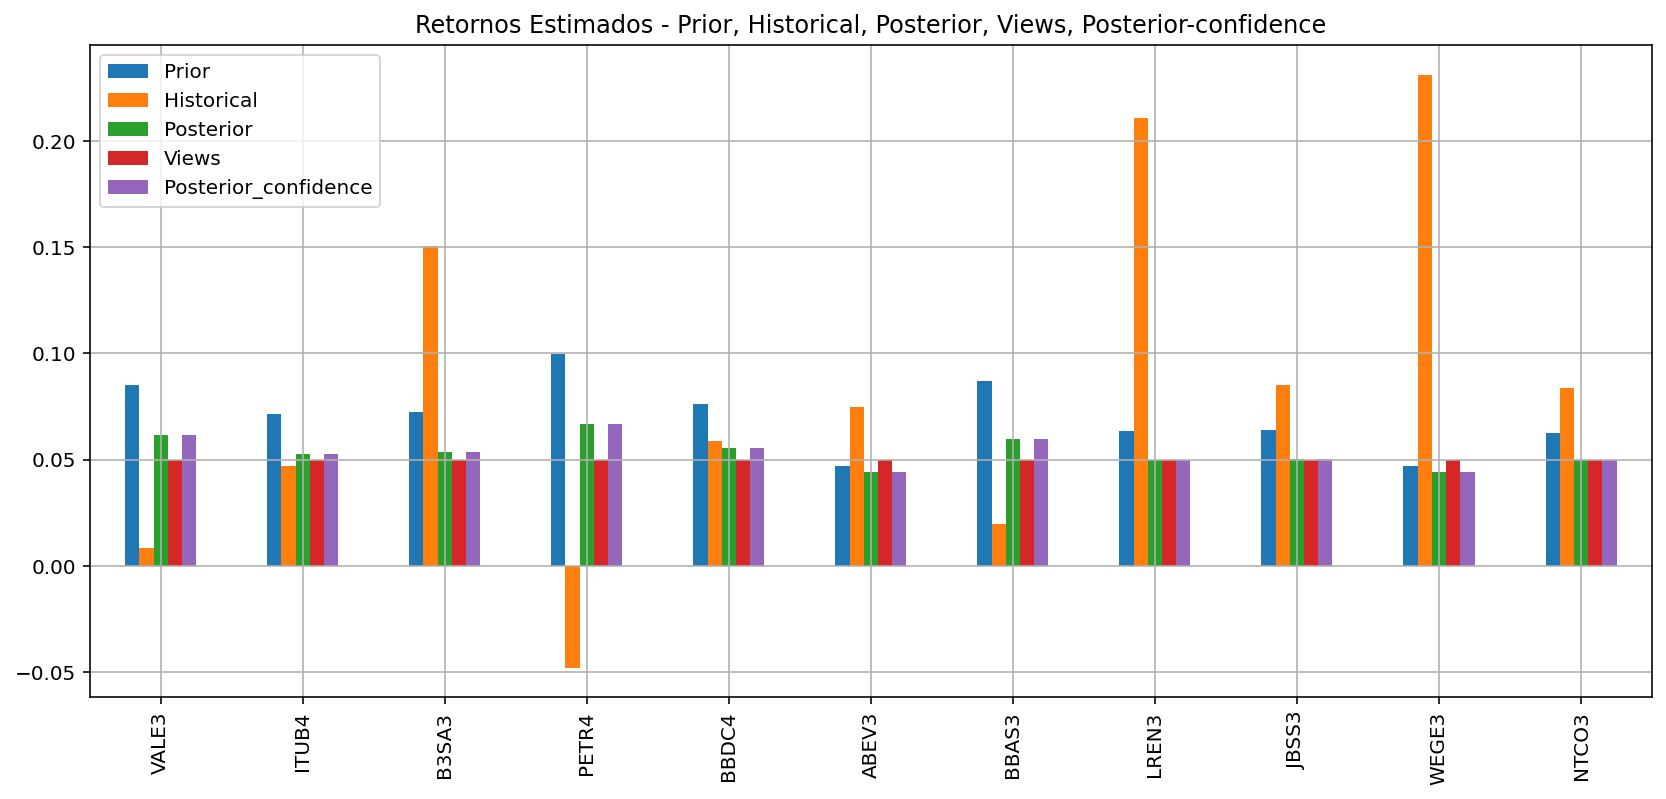

In [29]:
returns_df.plot.bar(figsize=(14,6), 
                    title = 'Retornos Estimados - Prior, Historical, Posterior, Views, Posterior-confidence', grid=True);
plt.savefig('C:\\Users\\arena\\TCC\\11 Ações\\chart4', dpi=300)

In [30]:
# calcular a matriz de covariancia
S_bl_confi = bl_confi.bl_cov()
S_bl_confi.to_csv('C:\\Users\\arena\\TCC\\11 Ações\\S_bl_confi.csv')
S_bl_confi = pd.read_csv('C:\\Users\\arena\\TCC\\11 Ações\\S_bl_confi.csv',  index_col=[0])
S_bl_confi

,VALE3,ITUB4,B3SA3,PETR4,BBDC4,ABEV3,BBAS3,LREN3,JBSS3,WEGE3,NTCO3
VALE3,0.187689,0.054161,0.058562,0.100473,0.060692,0.029903,0.069350,0.048967,0.051662,0.031622,0.053332
ITUB4,0.054161,0.101647,0.072068,0.087974,0.093728,0.033800,0.100842,0.060467,0.052041,0.034706,0.050951
B3SA3,0.058562,0.072068,0.137948,0.096623,0.078495,0.035886,0.092059,0.068070,0.062568,0.039303,0.058925
PETR4,0.100473,0.087974,0.096623,0.227958,0.098194,0.039007,0.125017,0.074673,0.075178,0.045154,0.072868
BBDC4,0.060692,0.093728,0.078495,0.098194,0.114956,0.037251,0.110995,0.068022,0.057453,0.037973,0.057242
ABEV3,0.029903,0.033800,0.035886,0.039007,0.037251,0.063257,0.039759,0.036196,0.030621,0.025658,0.035339
BBAS3,0.069350,0.100842,0.092059,0.125017,0.110995,0.039759,0.183534,0.080239,0.067776,0.040792,0.071962
LREN3,0.048967,0.060467,0.068070,0.074673,0.068022,0.036196,0.080239,0.134510,0.057994,0.036045,0.064628
JBSS3,0.051662,0.052041,0.062568,0.075178,0.057453,0.030621,0.067776,0.057994,0.252043,0.033006,0.051191
WEGE3,0.031622,0.034706,0.039303,0.045154,0.037973,0.025658,0.040792,0.036045,0.033006,0.096166,0.036577


In [33]:
#Calcular a carteira eficiente e os pesos dos ativos

# configurar modelo, apenas long, maximizando o indice de sharpe e com limite maximo de 15%
ef = pyp.EfficientFrontier(bl_return_confi, S_bl_confi, weight_bounds=(0, 0.15))
ef.add_objective(pyp.objective_functions.L2_reg, gamma=0.1)

#weights = ef.min_volatility()
weights = ef.max_sharpe(0.02)
#weights = ef.efficient_risk(0.40, market_neutral=False)

ef.portfolio_performance(verbose=True,risk_free_rate=0.02), print('\n')
wt_min_vola = pd.DataFrame([weights],columns=weights.keys()).T * 100

# salvar arquivo
wt_min_vola.to_csv('C:\\Users\\arena\\TCC\\11 Ações\\wt_min_vola_wts.csv')
wt_min_vola = pd.read_csv('C:\\Users\\arena\\TCC\\11 Ações\\wt_min_vola_wts.csv',  index_col=[0])

print ('Weights in Percentage ********************')
print(wt_min_vola.round(4))


Expected annual return: 5.3%
Annual volatility: 25.2%
Sharpe Ratio: 0.13


Weights in Percentage ********************
             0
VALE3  15.0000
ITUB4   8.8096
B3SA3   6.5936
PETR4  10.6373
BBDC4   8.3114
ABEV3  15.0000
BBAS3   5.8029
LREN3   5.8571
JBSS3   5.5008
WEGE3  11.5449
NTCO3   6.9424


C:\Users\arena\anaconda3\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:247: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


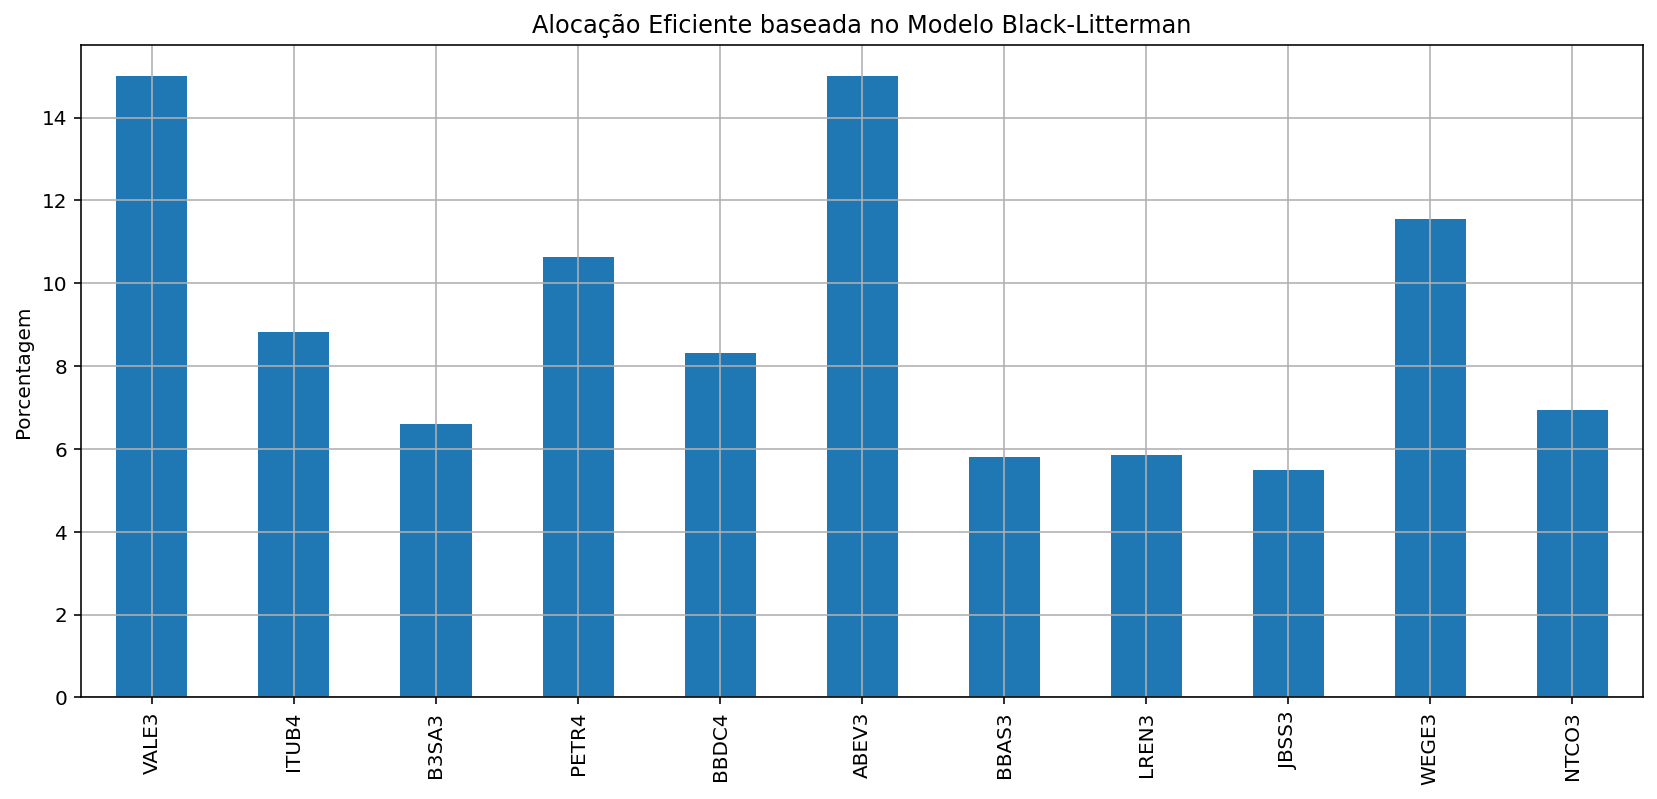

In [34]:

# grafico com os pesos
wt_min_vola.plot.bar(figsize=(14,6), 
                    title = 'Alocação Eficiente baseada no Modelo Black-Litterman', grid=True,legend=False);
plt.ylabel('Porcentagem')
plt.savefig('C:\\Users\\arena\\TCC\\11 Ações\\carteira eficiente', dpi=300)

Backtest Porfolio from Black–Litterman model for Asset Allocation - Backtrader

In [ ]:
#RASCUNHO


#num_ports = 430

#numeros = np.zeros(num_ports)

#for x in range(num_ports):
num_ports = 86

numeros = []
numeros.append(0.22)

for x in range(num_ports):
    numeros.append(numeros[x]+0.005)

abc = [0.3,0.4,0.5,0.6]



In [ ]:
# RASCUNHO
fronteffi = pyp.EfficientFrontier(bl_return_confi, S_bl_confi, weight_bounds=(0.01,0.20), gamma=0)
fronteffi.add_objective(pyp.objective_functions.L2_reg, gamma=0.1)

era = pd.DataFrame()

for i in abc:

    #weights = fronteffi.efficient_risk(i, market_neutral=False)
    weights = fronteffi.efficient_risk(i, market_neutral=False)
    #fronteffi.portfolio_performance(verbose=True), print('\n')
    era[i] = list(map(weights.get, weights.keys()))
    #print((map(weights.get, weights.keys())))

#pesos = pd.DataFrame([weights],columns=weights.keys()).T * 100
era['Tickers'] = weights.keys()
era = era.set_index(era['Tickers'])
era = era.drop('Tickers', 1)
# write it to csv for part 2
era.to_csv('C:\\Users\\arena\\TCC\\11 Ações\\era.csv')
era.to_excel('C:\\Users\\arena\\TCC\\11 Ações\\era.xlsx')
#pesos = pd.read_csv('C:\\Users\\arena\\TCC\\11 Ações\\pesos.csv',  index_col=[0])

#print ('Weights in Percentage ********************')
#print(pesos.round(4))

#pesos
era
